In [ ]:
# Install the required package
!pip install alpaca-trade-api


INFO:root:Connected to Alpaca API successfully.
INFO:root:Adjusted lengths of lists: 61 records.
INFO:root:Fetched historical data for NVDA on 2024-07-22 00:00:00.
INFO:root:Recorded trade for NVDA on 2024-07-22 00:00:00.
INFO:root:Fetched historical data for AMD on 2024-07-22 00:00:00.
INFO:root:Recorded trade for AMD on 2024-07-22 00:00:00.
INFO:root:Fetched historical data for MSFT on 2024-07-22 00:00:00.
INFO:root:Fetched historical data for TSLA on 2024-07-22 00:00:00.
INFO:root:Recorded trade for TSLA on 2024-07-22 00:00:00.
INFO:root:Fetched historical data for AMZN on 2024-07-22 00:00:00.
INFO:root:Fetched historical data for GOOGL on 2024-07-23 00:00:00.
INFO:root:Fetched historical data for AAPL on 2024-07-23 00:00:00.
INFO:root:Fetched historical data for AMZN on 2024-07-23 00:00:00.
INFO:root:Fetched historical data for NFLX on 2024-07-23 00:00:00.
INFO:root:Fetched historical data for GOOGL on 2024-07-23 00:00:00.
INFO:root:Fetched historical data for FB on 2024-07-24 00:0

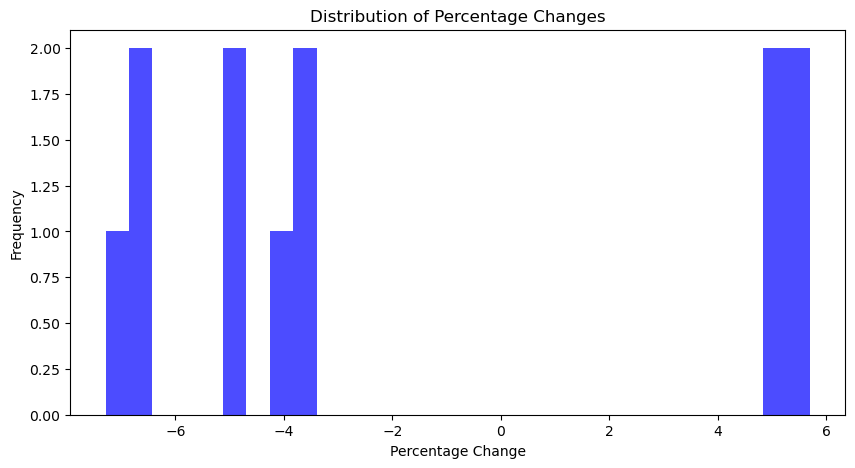

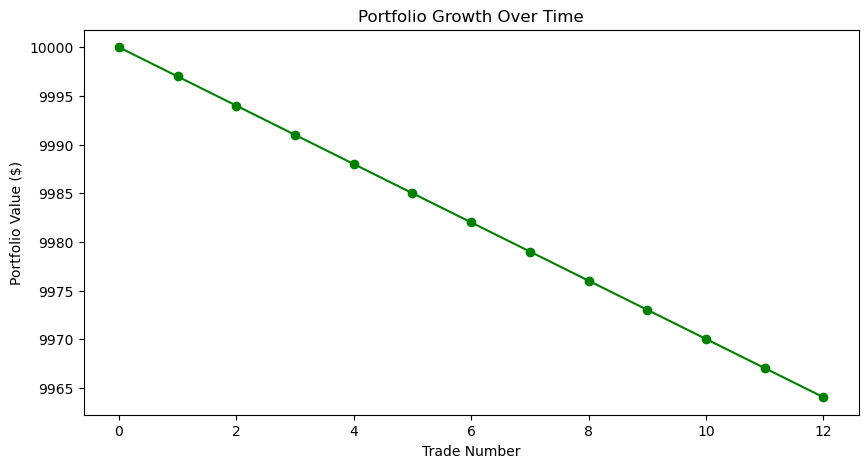

INFO:root:Start Cash: 10000
INFO:root:End Cash: 9964.059340640073
INFO:root:Portfolio Return: -0.36%


In [11]:
# Import necessary libraries
import alpaca_trade_api as tradeapi
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from config import API_KEY, SECRET_KEY
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

# Set up Alpaca API with imported keys
BASE_URL = 'https://paper-api.alpaca.markets/v2'
try:
    api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')
    logging.info("Connected to Alpaca API successfully.")
except Exception as e:
    logging.error(f"Error connecting to Alpaca API: {e}")
    raise

# Original data with mismatched lengths
data = {
    'Date': [
        '2024-07-22', '2024-07-22', '2024-07-22', '2024-07-22', '2024-07-22',
        '2024-07-23', '2024-07-23', '2024-07-23', '2024-07-23', '2024-07-23',
        '2024-07-24', '2024-07-24', '2024-07-24', '2024-07-24', '2024-07-24',
        '2024-07-25', '2024-07-25', '2024-07-25', '2024-07-25', '2024-07-25',
        '2024-07-26', '2024-07-26', '2024-07-26', '2024-07-26', '2024-07-26',
        '2024-07-29', '2024-07-29', '2024-07-29', '2024-07-29', '2024-07-29',
        '2024-07-30', '2024-07-30', '2024-07-30', '2024-07-30', '2024-07-30',
        '2024-07-31', '2024-07-31', '2024-07-31', '2024-07-31', '2024-07-31',
        '2024-08-01', '2024-08-01', '2024-08-01', '2024-08-01', '2024-08-01',
        '2024-08-02', '2024-08-02', '2024-08-02', '2024-08-02', '2024-08-02',
        '2024-08-05', '2024-08-05', '2024-08-05', '2024-08-05',
        '2024-08-06', '2024-08-06', '2024-08-06', '2024-08-06',
        '2024-08-07', '2024-08-07', '2024-08-07', '2024-08-07',
        '2024-08-08', '2024-08-08', '2024-08-08', '2024-08-08',
        '2024-08-09', '2024-08-09', '2024-08-09', '2024-08-09'
    ],
    'Ticker': [
        'NVDA', 'AMD', 'MSFT', 'TSLA', 'AMZN',
        'GOOGL', 'AAPL', 'AMZN', 'NFLX', 'GOOGL',
        'FB', 'QCOM', 'ADBE', 'ORCL', 'FB',
        'CRM', 'AVGO', 'TSLA', 'INTC', 'TSLA',
        'CSCO', 'TXN', 'IBM', 'EBAY', 'CSCO',
        'TSLA', 'NFLX', 'PYPL', 'CSCO',
        'GOOGL', 'FB', 'ADBE', 'ORCL',
        'NVDA', 'AMD', 'EBAY', 'CRM',
        'AMZN', 'AAPL', 'MSFT', 'IBM',
        'DIS', 'HD', 'NKE', 'PFE',
        'QCOM', 'AVGO', 'INTC', 'TXN',
        'AAPL', 'AMZN', 'MSFT', 'QCOM',
        'NVDA', 'ANET', 'QCOM', 'MSFT',
        'AMZN', 'AAPL', 'MSFT', 'QCOM'
    ],
    'Type': [
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer',
        'Gainer', 'Gainer', 'Gainer', 'Gainer'
    ],
    'Pct Change': [
        5.70, 5.40, 5.20, 5.00, 4.75,
        6.10, 5.85, 5.60, 5.35, 4.00,
        6.20, 5.95, 5.70, 5.45, 6.40,
        5.80, 5.55, 5.50, 5.25, 6.00,
        4.75, 4.50, 4.20, 3.95,
        5.10, 4.85, 4.60, 4.35,
        6.20, 5.95, 5.70, 5.45,
        5.80, 5.55, 5.30, 5.05,
        -4.55, -4.30, -4.00, -3.75,
        -4.75, -4.50, -4.25, -4.00,
        -4.30, -4.00, -3.75, -3.50,
        -6.62, -5.00, -5.03, -4.30,
        -6.62, -7.29, -6.62, -5.00,
        -4.30, -5.03, -5.00, -6.62,
        -4.30, -6.11, -2.83, -4.00
    ]
}

# Function to fix lengths of lists
def fix_length(data):
    min_length = min(len(data['Date']), len(data['Ticker']), len(data['Type']), len(data['Pct Change']))
    for key in data:
        data[key] = data[key][:min_length]
    return data

# Adjust lengths
fixed_data = fix_length(data)

# Check lengths after adjustment
logging.info(f"Adjusted lengths of lists: {len(fixed_data['Date'])} records.")

# Create DataFrame with adjusted data
top_gainers_losers = pd.DataFrame(fixed_data)
top_gainers_losers['Date'] = pd.to_datetime(top_gainers_losers['Date'])

# Add 'Gain or Loss' column based on 'Pct Change'
top_gainers_losers['Gain or Loss'] = top_gainers_losers['Pct Change'].apply(lambda x: 'Gainer' if x > 0 else 'Loser')

def fetch_historical_data(api, ticker, date):
    start_date = pd.to_datetime(date).strftime('%Y-%m-%dT09:30:00Z')
    end_date = pd.to_datetime(date).strftime('%Y-%m-%dT16:00:00Z')
    
    try:
        bars = api.get_bars(
            ticker,
            tradeapi.rest.TimeFrame.Minute,
            start=start_date,
            end=end_date
        ).df
        logging.info(f"Fetched historical data for {ticker} on {date}.")
        return bars
    except Exception as e:
        logging.error(f"Error fetching data for {ticker} on {date}: {e}")
        return pd.DataFrame()

trade_records = []

def record_trade(entry_price, exit_price, ticker, date, pct_change, outcome):
    if entry_price is not None and exit_price is not None:
        trade_data = {
            'Date': date,
            'Ticker': ticker,
            'Entry Price': entry_price,
            'Exit Price': exit_price,
            'Pct Change': pct_change,
            'Outcome': outcome,
            'Gain or Loss': 'Gainer' if pct_change > 0 else 'Loser'
        }
        trade_records.append(trade_data)
        logging.info(f"Recorded trade for {ticker} on {date}.")
    else:
        logging.warning(f"Missing entry or exit price for trade: {ticker} on {date}")

# Import necessary libraries
import pandas as pd
import logging

# Function to simulate trades with trailing stops
def simulate_trades(top_gainers_losers, api):
    results = []
    total_trades = 0  # Initialize trade counter

    for index, row in top_gainers_losers.iterrows():
        ticker = row['Ticker']
        date = row['Date']
        pct_change = row['Pct Change']
        gain_or_loss = row['Gain or Loss']
        
        data = fetch_historical_data(api, ticker, date)
        if data.empty:
            logging.warning(f"No data available for {ticker} on {date}. Skipping trade.")
            continue

        day_open = data.iloc[0]['open']
        first_hour_data = data.between_time('09:30', '10:30')
        
        if first_hour_data.empty:
            logging.warning(f"No data available for the first hour for {ticker} on {date}. Skipping trade.")
            continue
        
        first_hour_high = first_hour_data['high'].max()
        
        if first_hour_high >= day_open * 1.004:  # 0.4% up
            entry_price = day_open * 1.004
            highest_price = entry_price  # Start tracking the highest price
            exit_price = None

            for _, minute_data in data.iterrows():
                current_price = minute_data['high']

                # Update highest price during the trade
                if current_price > highest_price:
                    highest_price = current_price

                # Apply trailing stop loss
                if highest_price > entry_price * 1.008:  # If price has gone up 0.8% or more
                    # Example trailing stop: Lock in at 0.5% below the highest price reached
                    if current_price <= highest_price * 0.995:  # Trailing stop of 0.5% below high
                        exit_price = highest_price * 0.995
                        outcome = 'Win'
                        break

                # Initial stop loss of 0.3%
                if current_price <= entry_price * 0.997:
                    exit_price = entry_price * 0.997
                    outcome = 'Loss'
                    break
            else:
                exit_price = data.iloc[-1]['close']
                outcome = 'Held'

            # Record trade details
            total_trades += 1
            record_trade(entry_price, exit_price, ticker, date, pct_change, outcome)
            results.append({
                'Date': date,
                'Ticker': ticker,
                'Entry_Price': entry_price,  # Use underscores instead of spaces
                'Exit_Price': exit_price,
                'Pct_Change': pct_change,
                'Outcome': outcome,
                'Gain_or_Loss': gain_or_loss
            })
        else:
            logging.warning(f"{ticker} did not hit the 0.4% threshold on {date}. Skipping trade.")
        
    return pd.DataFrame(results), total_trades

# Updated simulate_portfolio function
def simulate_portfolio(start_cash, strategy_results):
    cash = start_cash
    portfolio_values = [cash]
    for result in strategy_results.itertuples():
        if result.Outcome == 'No Entry':
            continue
        trade_amount = cash * 0.1
        cash -= trade_amount
        
        entry_price = result.Entry_Price
        exit_price = result.Exit_Price

        if pd.isna(entry_price) or pd.isna(exit_price):
            logging.warning(f"Skipping trade with missing data: {result.Ticker} on {result.Date}")
            continue
        
        pct_change = (exit_price - entry_price) / entry_price * 100
        profit = trade_amount * pct_change / 100
        cash += trade_amount + profit
        portfolio_values.append(cash)
    return cash, portfolio_values

# Analyzing and visualizing the results
def analyze_and_visualize(strategy_results, portfolio_values, total_trades):
    win_percentage = (strategy_results['Outcome'] == 'Win').mean() * 100
    average_pct_change = strategy_results['Pct_Change'].mean()
    best_trade = strategy_results.loc[strategy_results['Pct_Change'].idxmax()]
    worst_trade = strategy_results.loc[strategy_results['Pct_Change'].idxmin()]
    
    logging.info(f"Total Trades: {total_trades}")
    logging.info(f"Win Percentage: {win_percentage:.2f}%")
    logging.info(f"Average Percentage Change: {average_pct_change:.2f}%")
    logging.info(f"Best Trade: {best_trade}")
    logging.info(f"Worst Trade: {worst_trade}")
    
    average_winning_pct = strategy_results.loc[strategy_results['Outcome'] == 'Win', 'Pct_Change'].mean()
    average_losing_pct = strategy_results.loc[strategy_results['Outcome'] == 'Loss', 'Pct_Change'].mean()
    logging.info(f"Average Winning Trade Percentage: {average_winning_pct:.2f}%")
    logging.info(f"Average Losing Trade Percentage: {average_losing_pct:.2f}%")
    
    gainers_results = strategy_results[strategy_results['Gain_or_Loss'] == 'Gainer']
    losers_results = strategy_results[strategy_results['Gain_or_Loss'] == 'Loser']
    
    end_cash_gainers, _ = simulate_portfolio(start_cash, gainers_results)
    end_cash_losers, _ = simulate_portfolio(start_cash, losers_results)
    
    return_percentage_gainers = (end_cash_gainers - start_cash) / start_cash * 100
    return_percentage_losers = (end_cash_losers - start_cash) / start_cash * 100
    
    logging.info(f"Return Percentage for Gainers: {return_percentage_gainers:.2f}%")
    logging.info(f"Return Percentage for Losers: {return_percentage_losers:.2f}%")
    
    plt.figure(figsize=(10, 5))
    plt.hist(strategy_results['Pct_Change'], bins=30, alpha=0.7, color='blue')
    plt.title('Distribution of Percentage Changes')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(portfolio_values)), portfolio_values, marker='o', linestyle='-', color='green')
    plt.title('Portfolio Growth Over Time')
    plt.xlabel('Trade Number')
    plt.ylabel('Portfolio Value ($)')
    plt.show()

if __name__ == "__main__":
    strategy_results, total_trades = simulate_trades(top_gainers_losers, api)

    start_cash = 10000
    end_cash, portfolio_values = simulate_portfolio(start_cash, strategy_results)

    analyze_and_visualize(strategy_results, portfolio_values, total_trades)

    portfolio_return = (end_cash - start_cash) / start_cash * 100

    logging.info(f"Start Cash: {start_cash}")
    logging.info(f"End Cash: {end_cash}")
    logging.info(f"Portfolio Return: {portfolio_return:.2f}%")

